# Exploring Relationships

## This notebook includes:

### 1. Importing Visualization Libraries & Data
### 2. Exploring Relationships:
   #### Correlation
   #### Scatterplots
   #### Pair Plots
   #### Categorical Plots

# 1. Importing Visualization Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# Ensuring no need to 'call' viz specifically after created
%matplotlib inline

In [2]:
matplotlib.__version__

'3.7.2'

#### matplotlib is updated, no issues should occur with visualizing correlation heat map later

In [3]:
# Turning project folder into string path 
path = r'C:\Users\keirr\12-2023 U.S Housing Market Analysis'

In [4]:
# Importing dataset with path
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Housing_Data_Cleaned.pkl'))

In [5]:
# Checking df
df.head(5)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0,40.75235,-73.97260


In [6]:
df.shape

(39017, 14)

In [7]:
df.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Address                     object
City                        object
State                       object
Zip Code Population          int64
Zip Code Density           float64
County                      object
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

# 2. Exploring Relationships

## I) Correlation

### a) matplotlib

In [8]:
# Knowing my df contains categorical data, need to subset the numeric values for correlation matrix

# Drop non-numeric columns by subsetting
df_num = df.select_dtypes(include='number')

In [9]:
df_num.dtypes

Zip Code                     int64
Price                      float64
Beds                         int64
Baths                        int64
Living Space                 int64
Zip Code Population          int64
Zip Code Density           float64
Median Household Income    float64
Latitude                   float64
Longitude                  float64
dtype: object

#### Lat., and Long., and Zip Code need to be excluded from matrix. Although they are numerical, they are only representations of physical area

In [12]:
# Calculate correlation matrix
corr_matrix = df[['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income']].corr()

In [13]:
corr_matrix

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
Price,1.000000,0.276238,0.461261,0.519409,-0.042330,0.153071,0.416939
Beds,0.276238,1.000000,0.703454,0.653027,0.069034,-0.133069,0.014033
Baths,0.461261,0.703454,1.000000,0.767714,0.002614,-0.067914,0.225906
Living Space,0.519409,0.653027,0.767714,1.000000,-0.043035,-0.104535,0.222234
Zip Code Population,-0.042330,0.069034,0.002614,-0.043035,1.000000,0.107778,-0.122913
Zip Code Density,0.153071,-0.133069,-0.067914,-0.104535,0.107778,1.000000,0.178601
Median Household Income,0.416939,0.014033,0.225906,0.222234,-0.122913,0.178601,1.000000


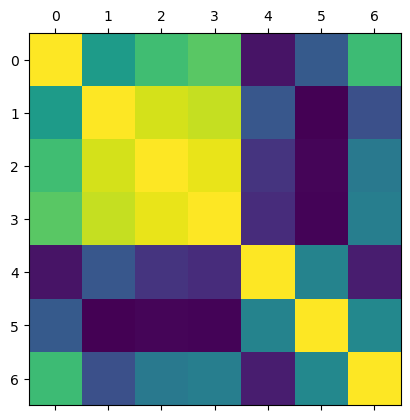

In [14]:
# Create a correlation heatmap using matplotlib

plt.matshow(corr_matrix.corr())
plt.show()

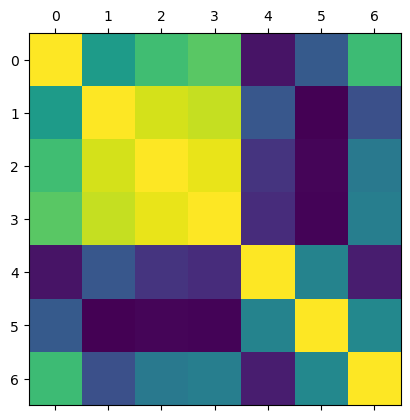

In [15]:
# Save figure
plt.matshow(corr_matrix.corr())
plt.savefig("plt_matrix.png") # This will save the image in the working directory. 

Text(0.5, 1.0, 'Correlation Matrix')

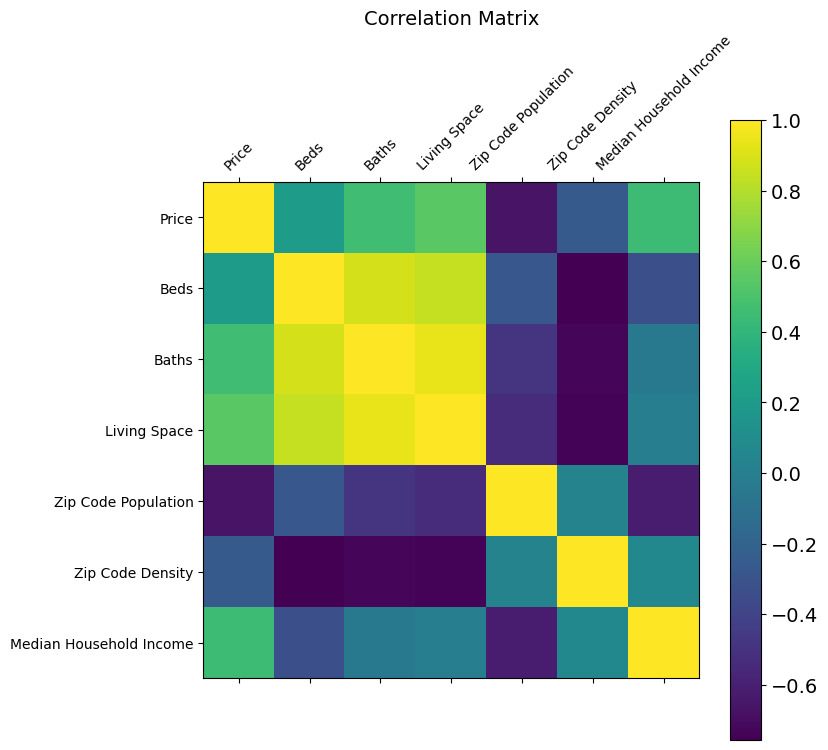

In [16]:
# Making it pretty!
# Adding labels, a legend, and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(corr_matrix.corr(), fignum=f.number) # type of plot
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend 
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### b) seaborn

In [17]:
# Already subset pertinent info, double checking corr_matrix
corr_matrix.columns

Index(['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population',
       'Zip Code Density', 'Median Household Income'],
      dtype='object')

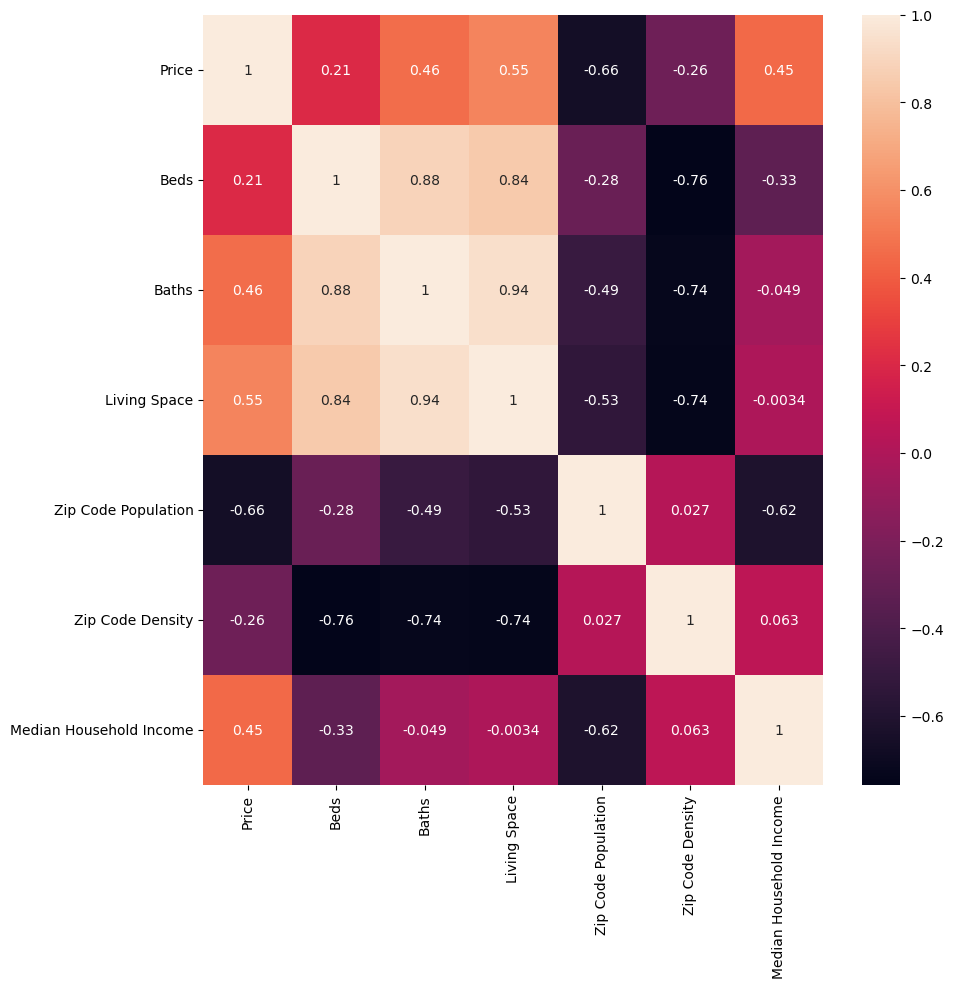

In [18]:
# Creating subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(corr_matrix.corr(), annot = True, ax = ax) 

#### Correlations that intrest me the most are:
   #### 1. Living Space / Baths = 0.94
   #### 2. Living Space / Beds = 0.84
   #### 3. Living Space / Price = 0.55
   #### 4. Median Household Income / Price = 0.45

## II) Scatterplot

In [19]:
# Subsetting df to contain only necessary columns
sub = df[['Price', 'Beds', 'Baths', 'Living Space', 'Zip Code Population', 'Zip Code Density', 'Median Household Income']]

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


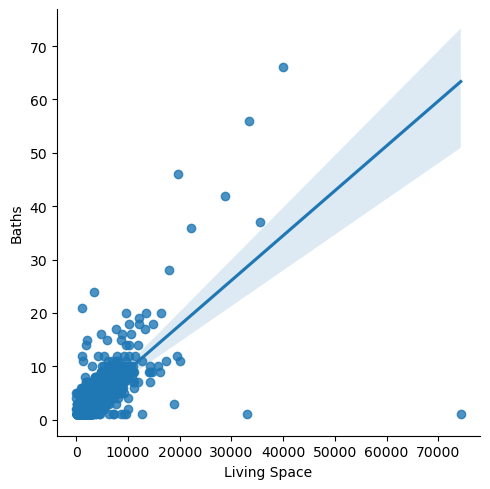

In [20]:
# Living Space & Baths = 0.94, should show positive correlation

# Creating a scatterplot for the "Living Space" and "Baths" columns in seaborn
sns.lmplot(x = 'Living Space', y = 'Baths', data = sub)

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


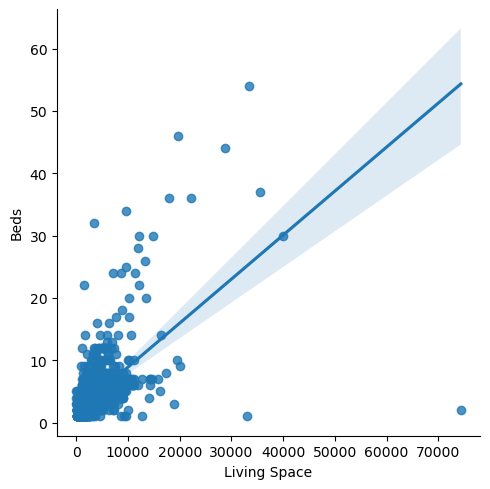

In [21]:
# Living Space & Beds = 0.84, should show positive correlation

# Creating a scatterplot for the "Living Space" and "Beds" columns in seaborn
sns.lmplot(x = 'Living Space', y = 'Beds', data = sub)

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


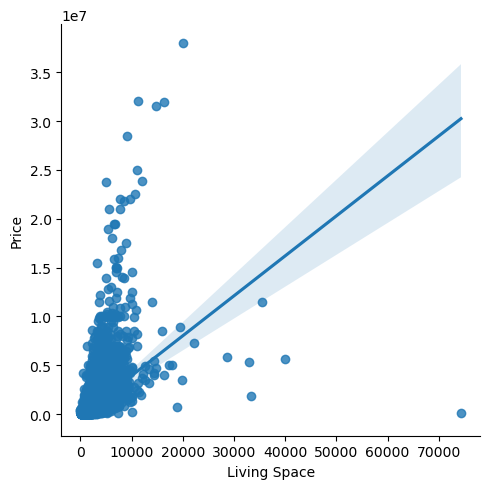

In [22]:
# Living Space & Price = 0.69, should show positive correlation

# Creating a scatterplot for the "Living Space" and "Price" columns in seaborn
sns.lmplot(x = 'Living Space', y = 'Price', data = sub)

##### Positive upward trend, points close to line, two outliers (1.x=75Ksqft,y=-0.0 & 2.x=22Ksqft,y=3.7)
##### Interesting cluster of points between 0-20Ksqft as the price dramatically increases within this area and then normalizes, if not decreases, in price.
#### I would initially think: "The larger the living space, the higher the price of the house.", but now I question what is affecting the price flucuation of the homes? Perhaps the size of the population within the area?

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


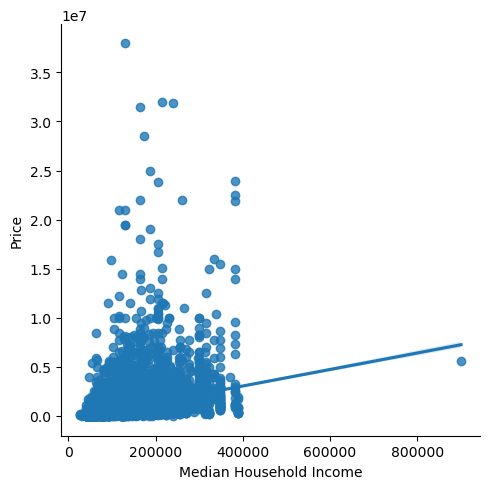

In [23]:
# Median Household Income & Price = 0.45, should show positive correlation

# Creating a scatterplot for the "Median Household Income" and "Price" columns in seaborn
sns.lmplot(x = 'Median Household Income', y = 'Price', data = sub)

#### Positive upward trend, two outliers (1.x=900,000,y=0.5 & 2.x=100,000,y=3.7)
#### Most households that make between 0-100,000 are purchasing homes <= 500,000
#### Households that make between 200,000+ start to flucuate in prices of homes they are purchasing, slightly dying down at 300,000 then shooting back up around 400,000

## III) Pair Plots

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

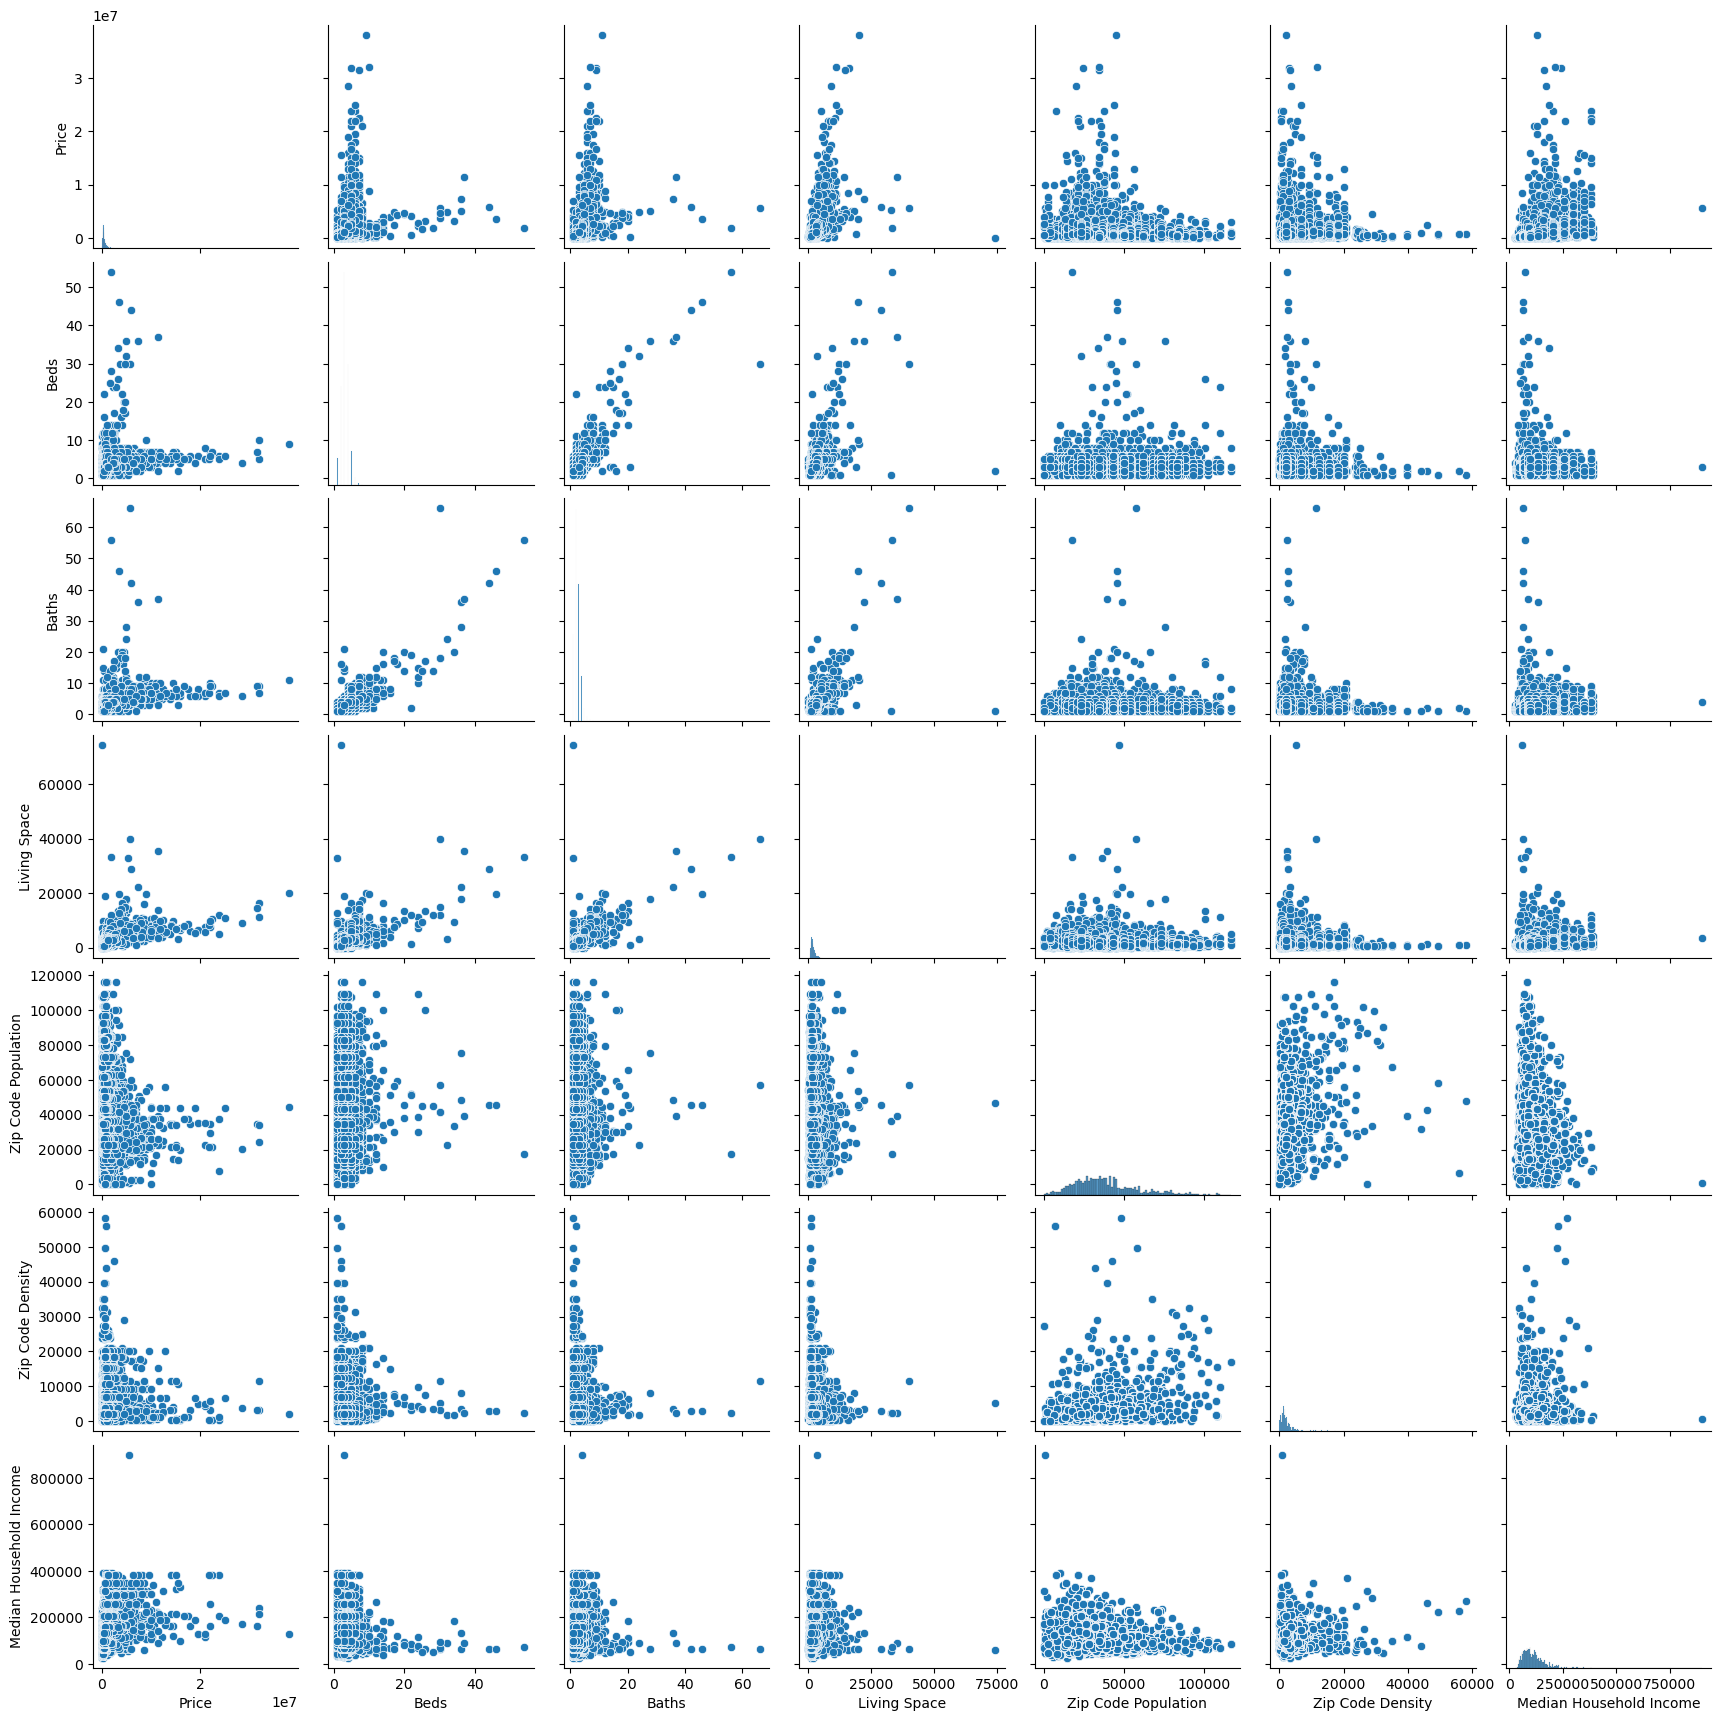

In [24]:
# Pair plot of all numeric values
d = sns.pairplot(sub)

## IV) Categorical Plots

#### I want to cross 'Price' with a couple of variables

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

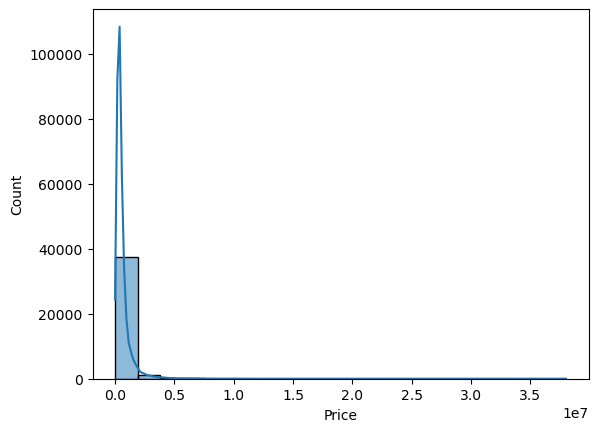

In [25]:
# Utilizing a histogram to visualize the distribution of the variables. 

sns.histplot(df['Price'], bins = 20, kde = True) # "kde" will add a line that encompasses the distribution

In [26]:
# Calculate frequency of each unique value in the 'Price' column
value_counts = df['Price'].value_counts()

value_counts #calling frequency

Price
350000.0     327
450000.0     297
425000.0     293
375000.0     291
250000.0     289
            ... 
464011.0       1
534600.0       1
514011.0       1
654190.0       1
2549950.0      1
Name: count, Length: 5196, dtype: int64

##### 

In [27]:
# Utilizing loc. function to place values for "Low", "Mid", and "High" price
df.loc[df['Price'] < 300000.0, 'Price Level'] = 'Low price'

C:\Users\keirr\AppData\Local\Temp\ipykernel_11368\1607310916.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low price' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Price'] < 300000.0, 'Price Level'] = 'Low price'


In [28]:
df.loc[(df['Price'] >= 300000.0) & (df['Price'] < 500000.0), 'Price Level'] = 'Middle price'

In [29]:
df.loc[df['Price'] >= 500000.0, 'Price Level'] = 'High price'

In [31]:
df['Price Level'].value_counts(dropna = False)

Price Level
High price      14378
Low price       12665
Middle price    11974
Name: count, dtype: int64

###  “WHERE is housing most expensive? Cheapest?”

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

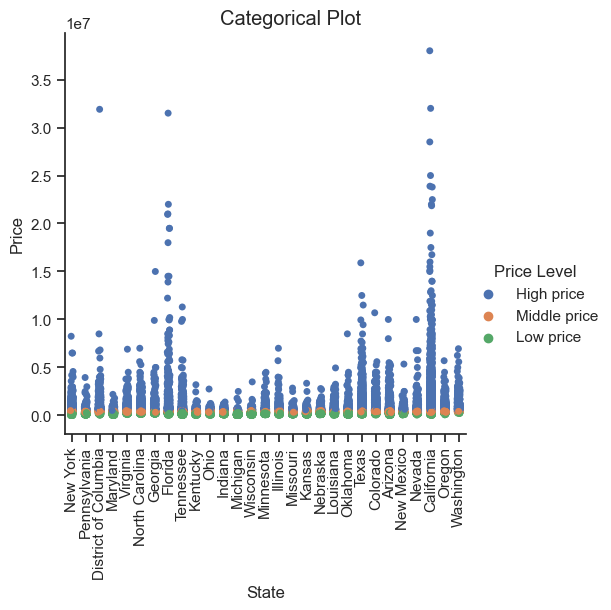

In [32]:
# Create a catplot using Seaborn

sns.set(style="ticks")  # Set the style
g = sns.catplot(x="State", y="Price", hue="Price Level", data=df)

# Set plot labels and title
g.set_axis_labels("State", "Price")
g.fig.suptitle("Categorical Plot")

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

#### Most expensive: California, Florida, Texas, D.C

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Median Household Income', ylabel='Count'>

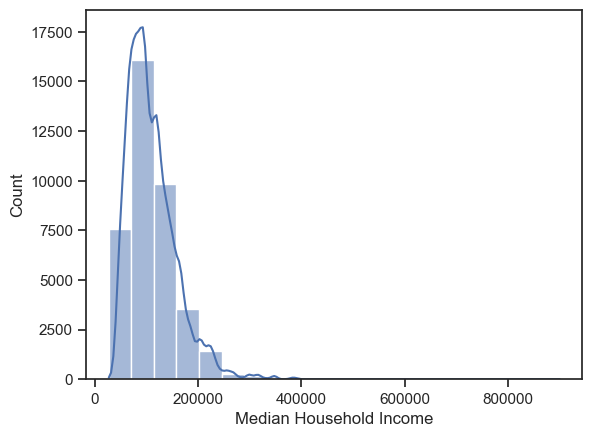

In [33]:
# Utilizing a histogram to visualize the distribution of the variables. 

sns.histplot(df['Median Household Income'], bins = 20, kde = True) # "kde" will add a line that encompasses the distribution

#### Looks like a majority of population across America makes <=100,000K

In [34]:
# Calculate frequency of each unique value in the 'Price' column
value_counts = df['Median Household Income'].value_counts()

value_counts #calling frequency

Median Household Income
82767.0     193
150363.0    190
96940.0     175
77917.0     157
140064.0    152
           ... 
163588.0      1
73109.0       1
85251.0       1
900203.0      1
370046.0      1
Name: count, Length: 1722, dtype: int64

In [35]:
# Utilizing loc. function to place values for "Low", "Mid", and "High" price
df.loc[df['Median Household Income'] < 70000.0, 'Income Group'] = 'Low Income'

C:\Users\keirr\AppData\Local\Temp\ipykernel_11368\1027154466.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low Income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Median Household Income'] < 70000.0, 'Income Group'] = 'Low Income'


In [36]:
df.loc[(df['Median Household Income'] >= 70000.0) & (df['Median Household Income'] < 200000.0), 'Income Group'] = 'Middle Income'

In [37]:
df.loc[df['Median Household Income'] >= 200000.0, 'Income Group'] = 'High Income'

In [38]:
df['Income Group'].value_counts(dropna = False)

Income Group
Middle Income    29674
Low Income        7234
High Income       2109
Name: count, dtype: int64

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

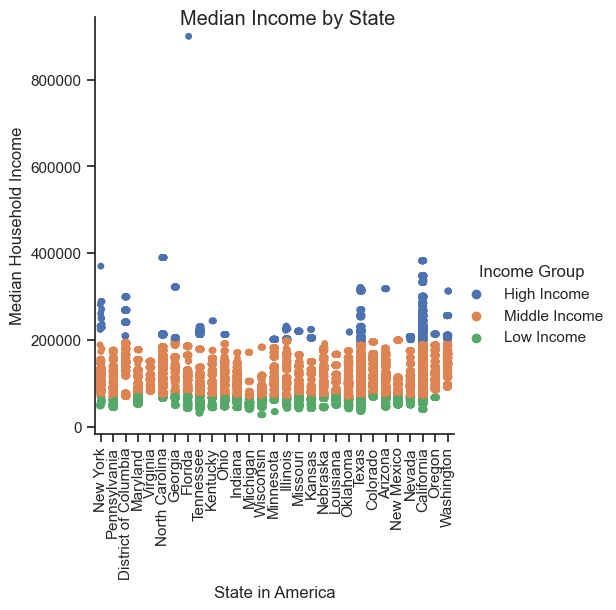

In [39]:
# Create a catplot using Seaborn

sns.set(style="ticks")  # Set the style
f = sns.catplot(x="State", y="Median Household Income", hue="Income Group", data=df)

# Set plot labels and title
f.set_axis_labels("State in America", "Median Household Income")
f.fig.suptitle("Median Income by State")

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

#### Interesting to see not many (if any) instances of High Income in Florida, considering it has some of the highest prices for homes, again, perhaps this is due to is location? I want to look deeper into geospatial visualizations
#### California has largest amount of instances of High Income, followed by Texas, New York, D.C, and Washington

In [40]:
# fig = f.get_figure()
f.savefig("Income_State.png") 

C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\keirr\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

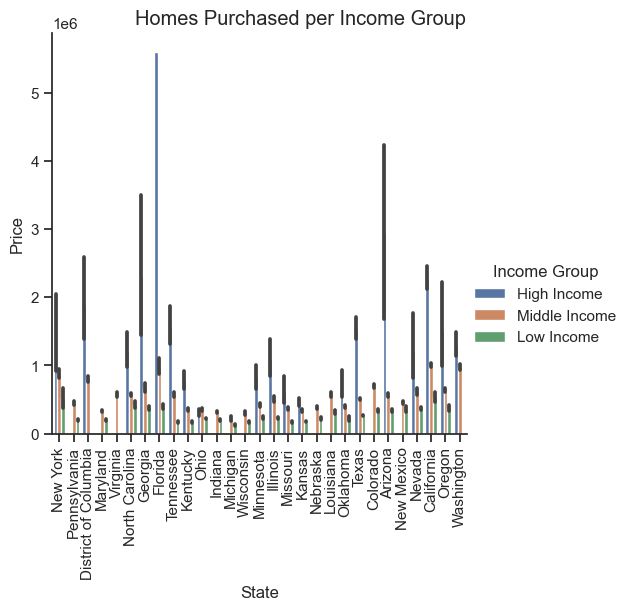

In [41]:
# Create a barplot using Seaborn

sns.set(style="ticks")  # Set the style
f = sns.catplot(x="State", y="Price", hue="Income Group", kind="bar", data=df)

# Set plot labels and title
f.set_axis_labels("State", "Price")
f.fig.suptitle("Homes Purchased per Income Group")

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=90)

plt.show()

#### Many States have High Income residents, but again we see the trend of New York, D.C., Florida, and California seeming to have the most.

### So far the best hypothesis I can deduce is: If the population of State or City is high, the larger the price of the home will be.